In [ ]:
import pandas as pd
import plotly.express as px
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading the Files

In [ ]:
andhra_2014=pd.read_csv('/content/drive/My Drive/Constituency/Combined_Cluster_2014.csv')
andhra_2019=pd.read_csv('/content/drive/My Drive/Constituency/Combined_Cluster_2019.csv')

# Data Pre-Processing 2014

In [ ]:
andhra_2014['Incumbent']=andhra_2014['Incumbent'].astype('int')
andhra_2014['Recontest']=andhra_2014['Recontest'].astype('int')
andhra_2014['Turncoat']=andhra_2014['Turncoat'].astype('int')
andhra_2014 = andhra_2014.replace({'Sex': {'M': 1, 'F': 0}})
andhra_2014['Party'] = andhra_2014['Party'].replace({'BJP': 'Third Parties', 'IND': 'Third Parties', 'NPT': 'Third Parties'})
party_dummies = pd.get_dummies(andhra_2014['Party'], prefix='Party')
andhra_2014 = pd.concat([andhra_2014, party_dummies], axis=1)
del andhra_2014['Party']

andhra_2014 = andhra_2014.replace({'Constituency_Type': {'GEN': 0, 'SC': 1,'ST':2}})
andhra_2014 = andhra_2014.replace({'Candidate_Type': {'GEN': 0, 'SC': 1,'ST':2}})
andhra_2014 = andhra_2014.replace({'Sub_Region': {'COASTAL ANDHRA': 0, 'RAYALA SEEMA': 1}})
del andhra_2014['Constituency_Type']
education_dummies = pd.get_dummies(andhra_2014['MyNeta_education'], prefix='Education')
andhra_2014 = pd.concat([andhra_2014, education_dummies], axis=1)

profession_dummies = pd.get_dummies(andhra_2014['TCPD_Prof_Main'], prefix='Profession')
andhra_2014 = pd.concat([andhra_2014, profession_dummies], axis=1)

del andhra_2014['MyNeta_education'],andhra_2014['TCPD_Prof_Main']

# Data Pre-Processing 2019

In [ ]:
andhra_2019['Incumbent']=andhra_2019['Incumbent'].astype('int')
andhra_2019['Recontest']=andhra_2019['Recontest'].astype('int')
andhra_2019['Turncoat']=andhra_2019['Turncoat'].astype('int')
andhra_2019 = andhra_2019.replace({'Sex': {'MAL': 1, 'FEM': 0}})
andhra_2019['Party'] = andhra_2019['Party'].replace({'BJP': 'Third Parties', 'IND': 'Third Parties', 'NPT': 'Third Parties'})
party_dummies = pd.get_dummies(andhra_2019['Party'], prefix='Party')
andhra_2019 = pd.concat([andhra_2019, party_dummies], axis=1)
del andhra_2019['Party']

andhra_2019 = andhra_2019.replace({'Constituency_Type': {'GENER': 0, 'SC': 1,'ST':2}})
andhra_2019 = andhra_2019.replace({'Candidate_Type': {'GENER': 0, 'SC': 1,'ST':2}})
andhra_2019 = andhra_2019.replace({'Sub_Region': {'COASTAL ANDHRA': 0, 'RAYALA SEEMA': 1}})
del andhra_2019['Constituency_Type']
education_dummies = pd.get_dummies(andhra_2019['MyNeta_education'], prefix='Education')
andhra_2019 = pd.concat([andhra_2019, education_dummies], axis=1)

profession_dummies = pd.get_dummies(andhra_2019['TCPD_Prof_Main'], prefix='Profession')
andhra_2019 = pd.concat([andhra_2019, profession_dummies], axis=1)

del andhra_2019['MyNeta_education'],andhra_2019['TCPD_Prof_Main']

# Number Of Constituencies in 2014 and 2019

In [ ]:
andhra_2014['predicted'].value_counts()

1    116
0     30
2     29
Name: predicted, dtype: int64

In [ ]:
andhra_2019['predicted'].value_counts()

0    80
2    72
1    23
Name: predicted, dtype: int64

# Gender 2014 and 2019

In [ ]:
pd.DataFrame(andhra_2014[['Sex','predicted']].value_counts()).reset_index()

,Sex,predicted,0
0,1,1,106
1,1,2,27
2,1,0,24
3,0,1,10
4,0,0,6
5,0,2,2


In [ ]:
pd.DataFrame(andhra_2019[['Sex','predicted']].value_counts()).reset_index()

,Sex,predicted,0
0,1,0,72
1,1,2,66
2,1,1,23
3,0,0,8
4,0,2,6


# Votes Difference Between Clusters 2014 and 2019

In [ ]:
px.box(andhra_2014,y='Votes',x='predicted')

In [ ]:
px.box(andhra_2019,y='Votes',x='predicted')

# Valid Votes Clusters

In [ ]:
px.box(andhra_2014,y='Valid_Votes',x='predicted')

In [ ]:
px.box(andhra_2019,y='Valid_Votes',x='predicted')

# Electors Cluster Difference

In [ ]:
px.box(andhra_2014,y='Electors',x='predicted')

In [ ]:
px.box(andhra_2019,y='Electors',x='predicted')

# Sub Region Wise Classification

<Axes: xlabel='Sub_Region', ylabel='count'>

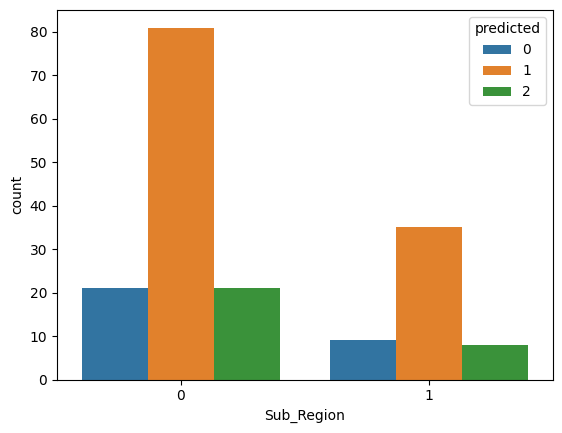

In [ ]:
sns.countplot(x=andhra_2014['Sub_Region'],hue=andhra_2014['predicted'])

<Axes: xlabel='Sub_Region', ylabel='count'>

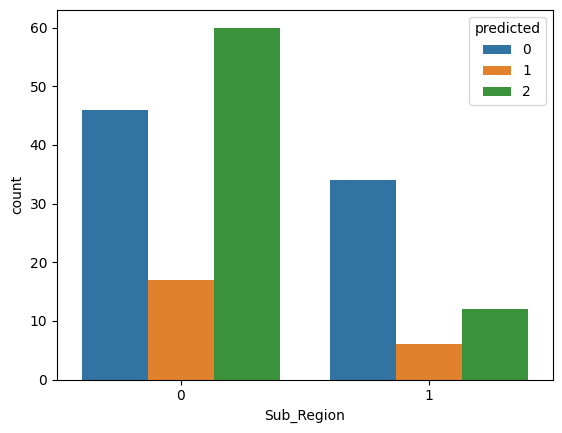

In [ ]:
sns.countplot(x=andhra_2019['Sub_Region'],hue=andhra_2019['predicted'])

# Turnout Percentage Cluster wise

In [ ]:
px.box(andhra_2014,y='Turnout_Percentage',x='predicted')

In [ ]:
px.box(andhra_2019,y='Turnout_Percentage',x='predicted')

# Vote Share Percentage Cluster

In [ ]:
px.box(andhra_2014,y='Vote_Share_Percentage',x='predicted')

In [ ]:
px.box(andhra_2019,y='Vote_Share_Percentage',x='predicted')

# Margin Percenatage Clusters

In [ ]:
px.box(andhra_2014,y='Margin_Percentage',x='predicted')

In [ ]:
px.box(andhra_2019,y='Margin_Percentage',x='predicted')

# Margin Clusters

In [ ]:
px.box(andhra_2014,y='Margin',x='predicted')

In [ ]:
px.box(andhra_2019,y='Margin',x='predicted')

# ENOP Clusters

In [ ]:
px.box(andhra_2014,y='ENOP',x='predicted')

In [ ]:
px.box(andhra_2019,y='ENOP',x='predicted')

# Contested Clustering

In [ ]:
px.box(andhra_2014,y='Contested',x='predicted')

In [ ]:
px.box(andhra_2019,y='Contested',x='predicted')

# No of terms Clustering

<Axes: xlabel='No_Terms', ylabel='count'>

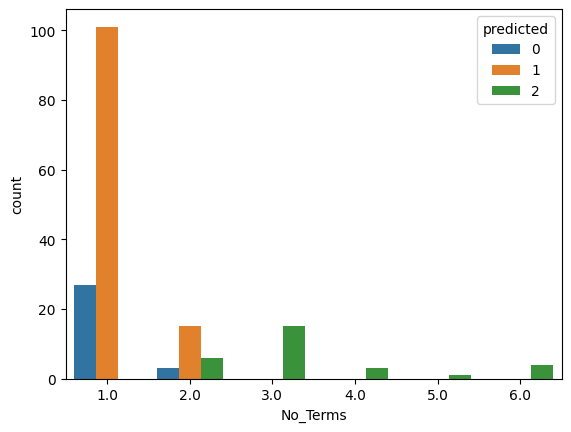

In [ ]:
sns.countplot(x=andhra_2014['No_Terms'],hue=andhra_2014['predicted'])

<Axes: xlabel='No_Terms', ylabel='count'>

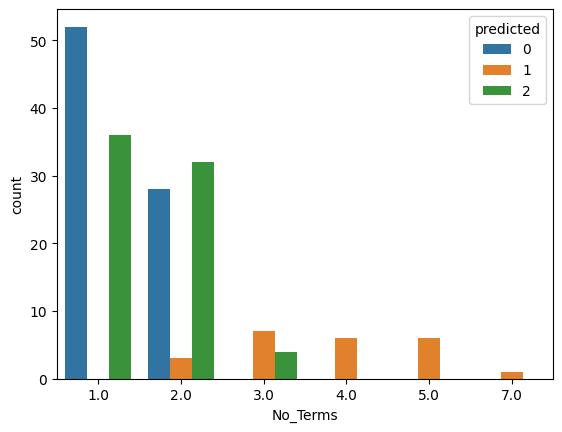

In [ ]:
sns.countplot(x=andhra_2019['No_Terms'],hue=andhra_2019['predicted'])

# Age Clustering

In [ ]:
px.box(andhra_2014,y='Age',x='predicted')

In [ ]:
px.box(andhra_2019,y='Age',x='predicted')

# Party Clustering

<Axes: xlabel='Party_TDP', ylabel='count'>

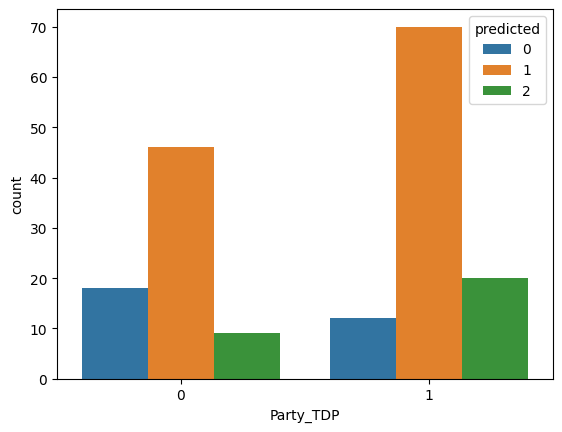

In [ ]:
sns.countplot(x=andhra_2014['Party_TDP'],hue=andhra_2014['predicted'])

<Axes: xlabel='Party_TDP', ylabel='count'>

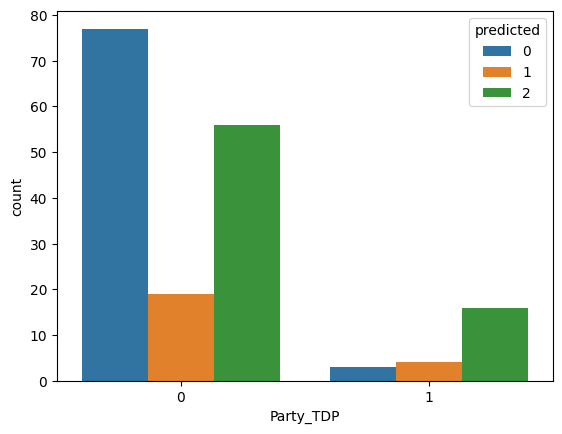

In [ ]:
sns.countplot(x=andhra_2019['Party_TDP'],hue=andhra_2019['predicted'])

<Axes: xlabel='Party_YSRCP', ylabel='count'>

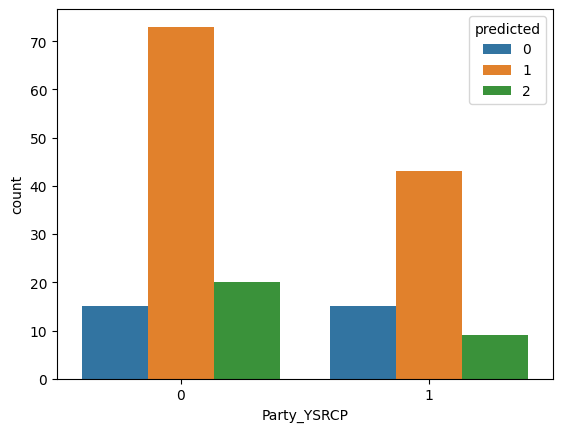

In [ ]:
sns.countplot(x=andhra_2014['Party_YSRCP'],hue=andhra_2014['predicted'])

<Axes: xlabel='Party_YSRCP', ylabel='count'>

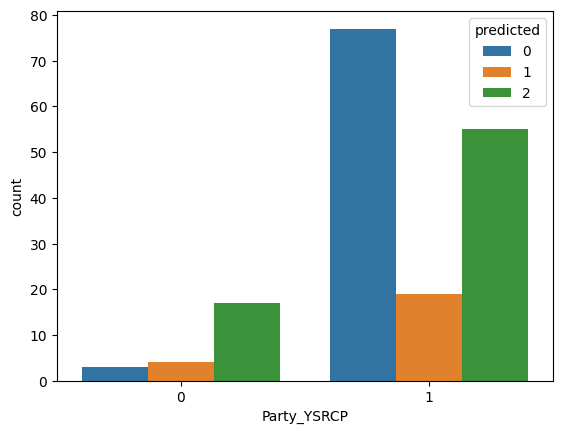

In [ ]:
sns.countplot(x=andhra_2019['Party_YSRCP'],hue=andhra_2019['predicted'])

In [ ]:
del andhra_2014['Unnamed: 0'],andhra_2019['Unnamed: 0']

# Cluster Mapping

In [ ]:

# Create a mapping from 2014 clusters to 2019 clusters
cluster_mapping = dict({0: 2, 1: 0, 2: 1})

cluster_mapping


{0: 2, 1: 0, 2: 1}

In [ ]:
andhra_2019

,Candidate,Sex,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Sub_Region,N_Cand,Turnout_Percentage,...,Profession_Education,Profession_Former Government,Profession_Labourer or Daily Wage,Profession_Liberal Profession or Professional,Profession_Other or Unspecified,Profession_Politics,Profession_Retired or Pension,Profession_Salaried Work or Employed,Profession_Small Business or Self-employed,Profession_Social Work
0,ASHOK BENDALAM,1,79992,0,172423,247941,ichchapuram,0,7,69.54,...,0,0,0,1,0,0,0,0,0,0
1,APPALARAJU SEEDIRI,1,76603,0,150691,206799,palasa,0,10,72.87,...,0,0,0,1,0,0,0,0,0,0
2,ATCHANNAIDU KINJARAPU,1,87658,0,176583,224852,tekkali,0,9,78.53,...,0,0,0,0,0,1,0,0,0,0
3,REDDY SHANTHI,0,76941,0,152599,217897,pathapatnam,0,9,70.03,...,0,0,0,0,0,0,0,0,0,0
4,DHARMANA PRASADA RAO,1,84084,0,177297,256243,srikakulam,0,9,69.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,K. NARAYANA SWAMY,1,103038,1,172673,199874,gangadhara nellore,1,12,86.39,...,0,0,0,0,0,0,0,0,0,0
171,Aranii Srenevasulu (Jangalapalli),1,91206,0,151550,193904,chittoor,1,12,78.16,...,0,0,0,0,0,0,0,0,0,0
172,M. BABU,1,103265,1,186918,216240,puthalapattu,1,11,86.44,...,0,0,0,0,0,0,0,0,0,0
173,N VENKATE GOWDA,1,119241,0,218957,256090,palamaner,1,11,85.50,...,0,0,0,0,0,0,0,0,0,0


In [ ]:



cluster_names_2014 = {0: "ClusterA", 1: "ClusterB", 2: "ClusterC"}


cluster_names_2019 = {k: cluster_names_2014[v] for k, v in cluster_mapping.items()}


andhra_2014["Cluster_Name"] = andhra_2014["predicted"].map(cluster_names_2014)
andhra_2019["Cluster_Name"] = andhra_2019["predicted"].map(cluster_names_2019)


andhra_2014.head()


,Candidate,Sex,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Sub_Region,N_Cand,Turnout_Percentage,...,Profession_Former Government,Profession_Liberal Profession or Professional,Profession_Other or Unspecified,Profession_Politics,Profession_Retired or Pension,Profession_Salaried Work or Employed,Profession_Small Business or Self-employed,Profession_Social Work,Profession_Student,Cluster_Name
0,ASHOK BENDALAM,1,86815,0,160919,224989,ichchapuram,0,9,71.52,...,0,0,0,0,0,0,0,0,0,ClusterB
1,GOUTHU SYAM SUNDER SIVAJI,1,69658,0,137294,190925,palasa,0,11,71.91,...,0,0,0,0,0,0,0,1,0,ClusterC
2,ATCHANNAIDU KINJARAPU,1,81167,0,160394,205744,tekkali,0,6,77.96,...,0,0,0,0,0,0,0,0,0,ClusterC
3,KALAMATA VENKATA RAMANA MURTHY,1,69320,0,141038,193789,pathapatnam,0,6,72.78,...,0,0,0,0,0,0,0,0,0,ClusterB
4,GUNDA LAKSHMI DEVI,0,88814,0,164523,228112,srikakulam,0,12,72.12,...,0,0,0,1,0,0,0,0,0,ClusterB


In [ ]:
andhra_2019.head()

,Candidate,Sex,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Sub_Region,N_Cand,Turnout_Percentage,...,Profession_Former Government,Profession_Labourer or Daily Wage,Profession_Liberal Profession or Professional,Profession_Other or Unspecified,Profession_Politics,Profession_Retired or Pension,Profession_Salaried Work or Employed,Profession_Small Business or Self-employed,Profession_Social Work,Cluster_Name
0,ASHOK BENDALAM,1,79992,0,172423,247941,ichchapuram,0,7,69.54,...,0,0,1,0,0,0,0,0,0,ClusterB
1,APPALARAJU SEEDIRI,1,76603,0,150691,206799,palasa,0,10,72.87,...,0,0,1,0,0,0,0,0,0,ClusterC
2,ATCHANNAIDU KINJARAPU,1,87658,0,176583,224852,tekkali,0,9,78.53,...,0,0,0,0,1,0,0,0,0,ClusterA
3,REDDY SHANTHI,0,76941,0,152599,217897,pathapatnam,0,9,70.03,...,0,0,0,0,0,0,0,0,0,ClusterC
4,DHARMANA PRASADA RAO,1,84084,0,177297,256243,srikakulam,0,9,69.19,...,0,0,0,0,0,0,0,0,0,ClusterA


# Index Creation

In [ ]:
# Assign values to clusters
cluster_values = {"ClusterA": 0, "ClusterB": 0.5, "ClusterC": 1}

# Map cluster names to their assigned values in both dataframes
andhra_2014["Cluster_Value"] = andhra_2014["Cluster_Name"].map(cluster_values)
andhra_2019["Cluster_Value"] = andhra_2019["Cluster_Name"].map(cluster_values)

# Compute district-level index for 2014 and 2019
district_index_2014 = andhra_2014.groupby("District_Name")["Cluster_Value"].mean()
district_index_2019 = andhra_2019.groupby("District_Name")["Cluster_Value"].mean()




# Index Correlation

In [ ]:
# Merge with ENOP, Turnout Percentage, and Margin for correlation analysis
district_data_2014 = andhra_2014.groupby("District_Name").agg({
    "ENOP": "mean",
    "Turnout_Percentage": "mean",
    "Margin": "mean"
})
district_data_2014["Index"] = district_index_2014

district_data_2019 = andhra_2019.groupby("District_Name").agg({
    "ENOP": "mean",
    "Turnout_Percentage": "mean",
    "Margin": "mean"
})
district_data_2019["Index"] = district_index_2019

# Compute correlations for 2014 and 2019
correlations_2014 = district_data_2014.corr()["Index"].drop("Index")
correlations_2019 = district_data_2019.corr()["Index"].drop("Index")

correlations_2014

ENOP                 -0.771960
Turnout_Percentage    0.131090
Margin               -0.120512
Name: Index, dtype: float64

In [ ]:
correlations_2019

ENOP                 -0.219401
Turnout_Percentage   -0.286303
Margin                0.639823
Name: Index, dtype: float64

# Mapping Combination

In [ ]:
district_data_2014=district_data_2014.reset_index()[['District_Name','Index']]
district_data_2019=district_data_2019.reset_index()[['District_Name','Index']]
district_data_2014.columns=['District_Name','Index_2014']
district_data_2019.columns=['District_Name','Index_2019']

In [ ]:
district_data = pd.merge(district_data_2014,district_data_2019,on='District_Name',how='inner')

In [ ]:
district_data['Index Political Difference'] = district_data['Index_2019']-district_data['Index_2014']

In [ ]:
mpi  = pd.read_excel('/content/drive/My Drive/Constituency/MPI_AP.xlsx')

# Calculating the MPI difference

In [ ]:
mpi['MPI Index DIfference'] = mpi['MPI (NFHS-5)'] - mpi['MPI (NFHS-4)']
mpi['Head Count Index Difference'] = mpi['Headcount Ratio (NFHS-5)'] - mpi['Headcount Ratio (NFHS-4)']
mpi['Intensity (NFHS-4) Difference'] = mpi['Intensity (NFHS-5)'] - mpi['Intensity (NFHS-4)']

In [ ]:
mpi

,District,Headcount Ratio (NFHS-4),Intensity (NFHS-4),MPI (NFHS-4),Headcount Ratio (NFHS-5),Intensity (NFHS-5),MPI (NFHS-5),MPI Index DIfference,Head Count Index Difference,Intensity (NFHS-4) Difference
0,anantapur,0.1247,0.4200,0.052,0.0674,0.4056,0.027,-0.025,-0.0573,-0.0144
1,chittoor,0.0964,0.4265,0.041,0.0566,0.3920,0.022,-0.019,-0.0398,-0.0345
2,east godavari,0.0851,0.4134,0.035,0.0613,0.4365,0.027,-0.008,-0.0238,0.0231
3,guntur,0.0726,0.4112,0.030,0.0436,0.3758,0.016,-0.014,-0.0290,-0.0354
4,krishna,0.0869,0.4156,0.036,0.0438,0.3822,0.017,-0.019,-0.0431,-0.0334
5,kurnool,0.1964,0.4587,0.090,0.1284,0.4232,0.054,-0.036,-0.0680,-0.0355
6,prakasam,0.1384,0.4544,0.063,0.0628,0.4360,0.027,-0.036,-0.0756,-0.0184
7,nellore,0.1127,0.4379,0.049,0.0541,0.4306,0.023,-0.026,-0.0586,-0.0073
8,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
9,vishakapatnam,0.1510,0.4699,0.071,0.0760,0.4081,0.031,-0.040,-0.0750,-0.0618


In [ ]:
political_poverty_index = pd.merge(district_data,mpi,left_on='District_Name',right_on='District',how='inner')

In [ ]:
political_poverty_index

,District_Name,Index_2014,Index_2019,Index Political Difference,District,Headcount Ratio (NFHS-4),Intensity (NFHS-4),MPI (NFHS-4),Headcount Ratio (NFHS-5),Intensity (NFHS-5),MPI (NFHS-5),MPI Index DIfference,Head Count Index Difference,Intensity (NFHS-4) Difference
0,anantapur,0.500000,0.750000,0.250000,anantapur,0.1247,0.4200,0.052,0.0674,0.4056,0.027,-0.025,-0.0573,-0.0144
1,chittoor,0.571429,0.714286,0.142857,chittoor,0.0964,0.4265,0.041,0.0566,0.3920,0.022,-0.019,-0.0398,-0.0345
2,east godavari,0.578947,0.578947,0.000000,east godavari,0.0851,0.4134,0.035,0.0613,0.4365,0.027,-0.008,-0.0238,0.0231
3,guntur,0.529412,0.529412,0.000000,guntur,0.0726,0.4112,0.030,0.0436,0.3758,0.016,-0.014,-0.0290,-0.0354
4,kadapa,0.550000,0.900000,0.350000,kadapa,0.0914,0.4183,0.038,0.0334,0.3851,0.013,-0.025,-0.0580,-0.0332
5,krishna,0.500000,0.531250,0.031250,krishna,0.0869,0.4156,0.036,0.0438,0.3822,0.017,-0.019,-0.0431,-0.0334
6,kurnool,0.357143,0.750000,0.392857,kurnool,0.1964,0.4587,0.090,0.1284,0.4232,0.054,-0.036,-0.0680,-0.0355
7,nellore,0.450000,0.550000,0.100000,nellore,0.1127,0.4379,0.049,0.0541,0.4306,0.023,-0.026,-0.0586,-0.0073
8,prakasam,0.500000,0.583333,0.083333,prakasam,0.1384,0.4544,0.063,0.0628,0.4360,0.027,-0.036,-0.0756,-0.0184
9,srikakulam,0.650000,0.650000,0.000000,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027


# Correlation Matrix

In [ ]:
co=political_poverty_index.corr()
px.imshow(co[(co>=0.3)|(co<=-0.3)])

<ipython-input-59-d7b07cc675e6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
political_poverty_index.to_csv('/content/drive/My Drive/Constituency/MPI_AP.csv')